**Importiere die notwendigen Packages**

In [1]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [2]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.stadt-zuerich.ch/dataset/ted_taz_verkehrszaehlungen_werte_fussgaenger_velo/download/2021_verkehrszaehlungen_werte_fussgaenger_velo.csv

In [32]:
# Filepath
fp = r"\\szh.loc\ssz\users\sszsim\Download\sid_dav_verkehrszaehlung_miv_OD2031_2021.csv"


# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   parse_dates=[17, 18],
    #parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

ValueError: unconverted data remains: -01-01T00:00:00

In der Folge ein paar erste Tests:

In [ ]:
type(data2betested)

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [33]:
data2betested.head(200)

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,...,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
0,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 00:00:00,2021-04-06,122,Gemessen
1,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 01:00:00,2021-04-06,177,Gemessen
2,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 02:00:00,2021-04-06,125,Gemessen
3,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 03:00:00,2021-04-06,84,Gemessen
4,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 04:00:00,2021-04-06,49,Gemessen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-09 03:00:00,2021-04-06,22,Gemessen
196,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-09 04:00:00,2021-04-06,14,Gemessen
197,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-09 05:00:00,2021-04-06,29,Gemessen
198,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-09 06:00:00,2021-04-06,47,Gemessen


In [34]:
data2betested.dtypes

MSID                          object
MSName                        object
ZSID                          object
ZSName                        object
Achse                         object
HNr                           object
Hoehe                         object
EKoord                       float64
NKoord                       float64
Richtung                      object
Knummer                        int64
Kname                         object
AnzDetektoren                  int64
D1ID                           int64
D2ID                          object
D3ID                          object
D4ID                          object
MessungDatZeit        datetime64[ns]
LieferDat             datetime64[ns]
AnzFahrzeuge                 float64
AnzFahrzeugeStatus            object
dtype: object

In [35]:
data2betested.shape

(414778, 21)

Beschreibe einzelne Attribute

In [36]:
data2betested.describe()

,EKoord,NKoord,Knummer,AnzDetektoren,D1ID,AnzFahrzeuge
count,414778,414778,414778,414778,414778,412961
mean,2682525,1248555,421,1,13,283
std,2106,2359,244,1,6,298
min,2678017,1242970,3,1,1,0
25%,2681303,1247026,243,1,11,60
50%,2682497,1248115,419,1,14,194
75%,2683669,1250310,621,2,16,396
max,2687631,1253804,789,3,29,2249


Wie viele Nullwerte gibt es im Datensatz?

In [37]:
data2betested.isnull().sum()

MSID                     0
MSName                   0
ZSID                     0
ZSName                   0
Achse                    0
HNr                      0
Hoehe                    0
EKoord                   0
NKoord                   0
Richtung                 0
Knummer                  0
Kname                    0
AnzDetektoren            0
D1ID                     0
D2ID                     0
D3ID                     0
D4ID                     0
MessungDatZeit           0
LieferDat                0
AnzFahrzeuge          1817
AnzFahrzeugeStatus       0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [40]:
data2betested['LieferDat']=pd.to_datetime(data2betested['LieferDat'], format='%YY')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,...,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
0,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 00:00:00,2021-04-06,122,Gemessen
1,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 01:00:00,2021-04-06,177,Gemessen
2,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 02:00:00,2021-04-06,125,Gemessen
3,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 03:00:00,2021-04-06,84,Gemessen
4,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-01-01 04:00:00,2021-04-06,49,Gemessen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414773,Z097M002,Unbekannt,Z097,Hofwiesenstrasse (Brunnenhofweg),Hofwiesenstrasse,Unbekannt,ab Brunnenhofweg,...,Unbekannt,Unbekannt,Unbekannt,2021-04-05 19:00:00,2021-04-06,306,Gemessen
414774,Z097M002,Unbekannt,Z097,Hofwiesenstrasse (Brunnenhofweg),Hofwiesenstrasse,Unbekannt,ab Brunnenhofweg,...,Unbekannt,Unbekannt,Unbekannt,2021-04-05 20:00:00,2021-04-06,283,Gemessen
414775,Z097M002,Unbekannt,Z097,Hofwiesenstrasse (Brunnenhofweg),Hofwiesenstrasse,Unbekannt,ab Brunnenhofweg,...,Unbekannt,Unbekannt,Unbekannt,2021-04-05 21:00:00,2021-04-06,208,Gemessen
414776,Z097M002,Unbekannt,Z097,Hofwiesenstrasse (Brunnenhofweg),Hofwiesenstrasse,Unbekannt,ab Brunnenhofweg,...,Unbekannt,Unbekannt,Unbekannt,2021-04-05 22:00:00,2021-04-06,140,Gemessen


Bereite die Daten für die Grafik unten vor

In [41]:
Jahre = data2betested.groupby("MessungDatZeit")
len(Jahre)

2279

In [42]:
for key, group in Jahre:
    print(key, len(group))

2021-01-01 00:00:00 182
2021-01-01 01:00:00 182
2021-01-01 02:00:00 182
2021-01-01 03:00:00 182
2021-01-01 04:00:00 182
2021-01-01 05:00:00 182
2021-01-01 06:00:00 182
2021-01-01 07:00:00 182
2021-01-01 08:00:00 182
2021-01-01 09:00:00 182
2021-01-01 10:00:00 182
2021-01-01 11:00:00 182
2021-01-01 12:00:00 182
2021-01-01 13:00:00 182
2021-01-01 14:00:00 182
2021-01-01 15:00:00 182
2021-01-01 16:00:00 182
2021-01-01 17:00:00 182
2021-01-01 18:00:00 182
2021-01-01 19:00:00 182
2021-01-01 20:00:00 182
2021-01-01 21:00:00 182
2021-01-01 22:00:00 182
2021-01-01 23:00:00 182
2021-01-02 00:00:00 182
2021-01-02 01:00:00 182
2021-01-02 02:00:00 182
2021-01-02 03:00:00 182
2021-01-02 04:00:00 182
2021-01-02 05:00:00 182
2021-01-02 06:00:00 182
2021-01-02 07:00:00 182
2021-01-02 08:00:00 182
2021-01-02 09:00:00 182
2021-01-02 10:00:00 182
2021-01-02 11:00:00 182
2021-01-02 12:00:00 182
2021-01-02 13:00:00 182
2021-01-02 14:00:00 182
2021-01-02 15:00:00 182
2021-01-02 16:00:00 182
2021-01-02 17:00

In [43]:
myJahr = "2021-02-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,...,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
744,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,27,Gemessen
3023,Z001M002,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,31,Gemessen
5302,Z002M001,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,16,Gemessen
7581,Z002M002,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,17,Gemessen
9860,Z003M001,Unbekannt,Z003,Sood-/Leimbachstrasse,Soodstrasse,Unbekannt,Leimbachstrasse,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,18,Gemessen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404127,Z095M002,Unbekannt,Z095,Schwamendingerstrasse (Dörflistrasse),Schwamendingerstrasse,Unbekannt,25m vor Dörflistrasse,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,25,Gemessen
406406,Z096M003,Unbekannt,Z096,Katzenschwanzstrasse (Witikonerstrasse),Katzenschwanzstrasse,Unbekannt,ab Witikonerstrasse,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,3,Gemessen
408685,Z096M004,Unbekannt,Z096,Katzenschwanzstrasse (Witikonerstrasse),Katzenschwanzstrasse,Unbekannt,vor Witikonerstrasse,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,2,Gemessen
410964,Z097M001,Unbekannt,Z097,Hofwiesenstrasse (Brunnenhofweg),Hofwiesenstrasse,Unbekannt,vor Brunnenhofweg,...,Unbekannt,Unbekannt,Unbekannt,2021-02-01,2021-04-06,41,Gemessen


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [46]:
myStandort = data2betested[(data2betested.ZSID=='Z097')]
test = data2betested.groupby(['MessungDatZeit', 'ZSID','ZSName', 'MSID', 'MSName' ])[['AnzFahrzeuge']].sum()
test
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum() oder .agg('median')
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

AnzFahrzeuge
MessungDatZeit      ZSID ZSName                                  MSID     MSName                 
2021-01-01 00:00:00 Z001 Seestrasse (Strandbad Wollishofen)      Z001M001 Unbekannt           122
                                                                 Z001M002 Unbekannt           135
                    Z002 Albisstrasse (Widmerstrasse)            Z002M001 Unbekannt           109
                                                                 Z002M002 Unbekannt           166
                    Z003 Sood-/Leimbachstrasse                   Z003M001 Unbekannt            37
...                                                                                           ...
2021-04-05 23:00:00 Z095 Schwamendingerstrasse (Dörflistrasse)   Z095M002 Unbekannt            42
                    Z096 Katzenschwanzstrasse (Witikonerstrasse) Z096M003 Unbekannt            13
                                                                 Z096M004 Unbekannt            16
                    Z097 Hofwiesenstrasse (Brunnenhofweg)        Z097M001 Unbekannt            79
                                                                 Z097M002 Unbekannt            84

[414778 rows x 1 columns]

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [47]:
from pivottablejs import pivot_ui

#pivot_ui(data2betested)
pivot_ui(test)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [16]:
mySelection = aktuellesJahr[(aktuellesJahr.KreisSort<2) & (aktuellesJahr.KonOGDSort==1)]
mySelection.head()


AttributeError: 'DataFrame' object has no attribute 'KreisSort'

In [17]:
#mySelection = aktuellesJahr[["StatZoneSort","AnzBestWir"]]
#mySelection

In [18]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['KonOGDKurz'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='StatZoneLang',
    y='AnzBestWir',
    color='KonOGDKurz'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [19]:
alt.Chart(mySelection).mark_circle(size=60).encode(
    x='StatZoneLang',
    y='KonOGDKurz',
    color='AnzBestWir',
    tooltip=['KonOGDKurz','StichtagDatJahr','AnzBestWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

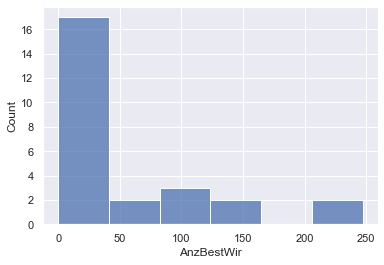

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelection, x="AnzBestWir") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [21]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_statzonen = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statzonen_map.json"
df_statzonen = gpd.read_file(input_statzonen)
df_statzonen.head(2)


,objectid,objid,stznr,stzname,qnr,qname,knr,kname,geometry
0,1,154,7303,Hegibach,73,Hirslanden,7,Kreis 7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ..."
1,2,89,7302,Klus,73,Hirslanden,7,Kreis 7,"POLYGON ((8.57281 47.35806, 8.57274 47.35804, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html